In [1]:
import pandas as pd
import sys
sys.path.append("..")
from src.Utils import read_jsonlines
from src.Eval import get_iobs_from_data
import os

data = pd.read_parquet("../data/dataset/reddit+shsyt/data.parquet")#.drop_duplicates(subset="id")
data["yt_id"] = data.id.apply(lambda x: x.split("_", 1)[1])


data["has_WoA"] = data.IOB.apply(lambda x: "B-WoA" in x)
data["has_Artist"] = data.IOB.apply(lambda x: "B-Artist" in x)
data["index"] = data.groupby("subset").cumcount()


In [24]:
output_path = "../output/reddit+shsyt/"

def get_IOB_preds(output_path) -> pd.DataFrame:
    """Get multiindex dataframe with predicted IOB lists.
    Args:
        output_path (_type_): _description_
    Returns:
        pd.DataFrame: _description_
    """
    data = pd.DataFrame()

    for model in os.listdir(output_path):
        for f in os.listdir(os.path.join(output_path, model)):
            _ = f.split(".")[0].split("_")
            dataset, k = _[0], int(_[1].replace("shot", ""))
            sampling = _[2] if len(_) > 2 else ""

            preds = read_jsonlines(os.path.join(output_path, model, f))
            _, pred_iobs = get_iobs_from_data(preds)
            _data = pd.DataFrame(pd.Series(pred_iobs), columns=["IOB_pred"]).reset_index()
            _data["subset"] = int(dataset.replace("dataset", ""))
            _data = _data.set_index(["subset", "index"])
            _data.columns =  pd.MultiIndex.from_product([[model], [k], [sampling]])

            _new_cols = _data.columns.difference(data.columns)
    
            if not _new_cols.empty:
                data = pd.concat([data, _data[_new_cols]], axis=1, join='outer')
            else:
                data = data.combine_first(_data)
    
    return data

             
preds = get_IOB_preds(output_path)


In [25]:
preds#.loc[:, ("llama3.1:70b", 5, "rand")]


firefunction-v2  \
                                                             5    
                                                           rand   
subset index                                                      
1      0           [B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA]   
       1          [B-Artist, B-WoA, I-WoA, I-WoA, I-WoA, I-WoA]   
       2      [B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA, I...   
       3      [B-WoA, I-WoA, I-WoA, I-WoA, I-WoA, I-WoA, O, ...   
       4      [B-WoA, I-WoA, O, B-Artist, I-Artist, O, B-Art...   
...                                                         ...   
5      653                          [O, O, O, O, O, O, O, O, O]   
       654                                      [O, O, O, O, O]   
       655                       [O, O, O, O, O, O, O, O, O, O]   
       656           [O, O, O, O, O, O, O, O, O, O, O, O, O, O]   
       657                       [O, O, B-WoA, I-WoA, I-WoA, O]   

                                                                 \
                                                                  
                                                          tfidf   
subset index                                                      
1      0           [B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA]   
       1          [B-Artist, B-WoA, I-WoA, I-WoA, I-WoA, I-WoA]   
       2      [B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA, I...   
       3      [B-WoA, I-WoA, I-WoA, I-WoA, I-WoA, I-WoA, O, ...   
       4      [B-WoA, I-WoA, O, B-Artist, I-Artist, O, B-Art...   
...                                                         ...   
5      653                          [O, O, O, O, O, O, O, O, O]   
       654                                      [O, O, O, O, O]   
       655                       [O, O, O, O, O, O, O, O, O, O]   
       656           [O, O, O, O, O, O, O, O, O, O, O, O, O, O]   
       657                       [O, O, B-WoA, I-WoA, I-WoA, O]   

                                                                 \
                                                             25   
                                                           rand   
subset index                                                      
1      0           [B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA]   
       1          [B-Artist, B-WoA, I-WoA, I-WoA, I-WoA, I-WoA]   
       2      [B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA, I...   
       3      [B-WoA, I-WoA, I-WoA, I-WoA, I-WoA, I-WoA, O, ...   
       4      [B-WoA, I-WoA, O, B-Artist, I-Artist, O, B-Art...   
...                                                         ...   
5      653                          [O, O, O, O, O, O, O, O, O]   
       654                                      [O, O, O, O, O]   
       655                       [O, O, O, O, O, O, O, O, O, O]   
       656           [O, O, O, O, O, O, O, O, O, O, O, O, O, O]   
       657                       [O, O, B-WoA, I-WoA, I-WoA, O]   

                                                                 \
                                                                  
                                                          tfidf   
subset index                                                      
1      0                                     [O, O, O, O, O, O]   
       1          [B-Artist, B-WoA, I-WoA, I-WoA, I-WoA, I-WoA]   
       2      [B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA, I...   
       3      [B-WoA, I-WoA, I-WoA, I-WoA, I-WoA, I-WoA, O, ...   
       4      [B-WoA, I-WoA, O, B-Artist, I-Artist, O, B-Art...   
...                                                         ...   
5      653                          [O, O, O, O, O, O, O, O, O]   
       654                                      [O, O, O, O, O]   
       655                       [O, O, O, O, O, O, O, O, O, O]   
       656           [O, O, O, O, O, O, O, O, O, O, O, O, O, O]   
       657                 [O, O, B-Artist, I-Artist, B-WoA, O]   

                        

In [10]:
preds.columns

MultiIndex([('firefunction-v2',  5, 'tfidf',    'index'),
            ('firefunction-v2',  5, 'tfidf', 'IOB_pred'),
            ('firefunction-v2',  5, 'tfidf',   'subset'),
            ('firefunction-v2',  5,  'rand',    'index'),
            ('firefunction-v2',  5,  'rand', 'IOB_pred'),
            ('firefunction-v2',  5,  'rand',   'subset'),
            ('firefunction-v2', 25, 'tfidf',    'index'),
            ('firefunction-v2', 25, 'tfidf', 'IOB_pred'),
            ('firefunction-v2', 25, 'tfidf',   'subset'),
            ('firefunction-v2', 25,  'rand',    'index'),
            ('firefunction-v2', 25,  'rand', 'IOB_pred'),
            ('firefunction-v2', 25,  'rand',   'subset')],
           )

In [ ]:

data_shs = pd.read_json("../data/raw/shs100k_metadata.jsonl", lines=True, orient="records")
data_shs = data_shs[['work_id', 'perf_id','perf_title', 'perf_artist']]
data_shs.columns = pd.MultiIndex.from_product([[''], data_shs.columns])

In [ ]:
from typing import List
import sys
sys.path.append("../preprocessing")
from Processor import PerformerStringPreprocessor
from Utils import simplify_string, remove_bracket_with_one_content


def get_title_variations(s: str) -> List[str]:
    s = remove_bracket_with_one_content(s)
    l = s.split("/")
    l = [simplify_string(s) for s in l]
    return l

performer_processor = PerformerStringPreprocessor()

def get_performer_variations(s: str) -> List[str]:
    l = performer_processor.split_performers(s)
    l = [simplify_string(s) for s in l]
    l = performer_processor.article_preprocessing(l)
    return l

get_performer_variations("quentin tarantino feat. steven spielberg")


['quentin tarantino', 'steven spielberg']

# Factual Memorization

In [4]:
import pandas as pd
import ast

_ = pd.read_json("../data/intermediate/shs100k2_memorization.jsonl", lines=True, orient="records")

cols = []
for c in _.columns:
    new_c = ast.literal_eval(c)
    if new_c[1] == '':
        new_c = (new_c[1], new_c[0])
    cols.append(new_c)

_.columns = pd.MultiIndex.from_tuples(cols, names=["Model", ""])
_ = pd.merge(_, data_shs, 
                             how="left", on=[("", "work_id"), ("", "perf_id")])
# _ = _[[c for c in _.columns if "AW2" not in c[1]]]
_.columns = [(c[0], c[1].replace("AW3:", "AW2:")) for c in _.columns]
_ = _
_.columns = pd.MultiIndex.from_tuples(_.columns, names=["Model", ""])


In [5]:
models = []

for c in _.columns:
    model = c[0]
    if model != '' and model not in models:
        models.append(model)

        __ = _[model]

        _aw_cols = [c for c in __.columns if c.startswith("AW")]
        _aw_cols_related = [c for c in _aw_cols if "Related" in c]
        _aw_cols_correct = [c for c in _aw_cols if "Correct" in c]

        def correctness(row):
            if row[_aw_cols].T.sum() == 0:
                return "test_failed"
            elif row[_aw_cols_correct].T.sum() >= 2:
                return "test_passed"
            elif row[_aw_cols_correct].T.sum() == 0 and row[_aw_cols_related].T.sum() > 0:
                return "test_min1_partly"
            elif row[_aw_cols_correct].T.sum() > 0:
                return "test_min1"
            
        _[(model, "Correctness")] = __.apply(correctness, axis=1)
        _[(model, "Correctness")].value_counts()

__ = _[[("", "set_id")] + [(model, "Correctness") for model in models]]
__.columns = ["set_id"] + [f"{model}_Correctness" for model in models]
data_memorization = pd.merge(data, __, on="set_id", how="left")
data_memorization



,id,set_id,Origin,TEXT,IOB,subset,yt_id,has_WoA,has_Artist,ind,Llama3.1-70B_Correctness,Llama3.1-8B_Correctness
0,21_L1-t3YvFH40,21.0,YouTube,"[gladys, knight, &, the, pips, -, yesterday]","[B-Artist, I-Artist, O, B-Artist, I-Artist, O,...",4,L1-t3YvFH40,True,True,0,test_passed,test_passed
1,21_L1-t3YvFH40,21.0,YouTube,"[gladys, knight, &, the, pips, -, yesterday]","[B-Artist, I-Artist, O, B-Artist, I-Artist, O,...",4,L1-t3YvFH40,True,True,0,test_min1,test_min1
2,21_4SE8UvqaSWQ,21.0,YouTube,"[hooked, on, the, beatles, -, the, end]","[B-WoA, I-WoA, I-WoA, I-WoA, O, B-WoA, I-WoA]",4,4SE8UvqaSWQ,True,False,1,test_passed,test_passed
3,21_4SE8UvqaSWQ,21.0,YouTube,"[hooked, on, the, beatles, -, the, end]","[B-WoA, I-WoA, I-WoA, I-WoA, O, B-WoA, I-WoA]",4,4SE8UvqaSWQ,True,False,1,test_min1,test_min1
4,58_hQz-aZH-ozU,58.0,YouTube,"[juan, rozoff, -, plaisir, d, amour]","[B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA]",1,hQz-aZH-ozU,True,True,0,test_min1_partly,test_min1
...,...,...,...,...,...,...,...,...,...,...,...,...
3438,dataset4_746,12669.0,Reddit,"[songs, like, sub, urbams, cradle, ?]","[O, O, B-Artist, I-Artist, B-WoA, O]",5,746,True,True,657,NaN,NaN
3439,dataset4_747,12670.0,Reddit,"[songs, /, artists, like, quarter, past, midni...","[O, O, O, O, B-WoA, I-WoA, I-WoA, O, B-Artist]",1,747,True,True,659,NaN,NaN
3440,dataset4_748,12671.0,Reddit,"[soft, -, voiced, vocals]","[O, O, O, O]",2,748,False,False,659,NaN,NaN
3441,dataset4_749,12672.0,Reddit,"[find, me, music, with, dark, lyrics, covered,...","[O, O, O, O, O, O, O, O, O, O, O, O, O]",3,749,False,False,657,NaN,NaN


In [6]:
data_memorization

,id,set_id,Origin,TEXT,IOB,subset,yt_id,has_WoA,has_Artist,ind,Llama3.1-70B_Correctness,Llama3.1-8B_Correctness
0,21_L1-t3YvFH40,21.0,YouTube,"[gladys, knight, &, the, pips, -, yesterday]","[B-Artist, I-Artist, O, B-Artist, I-Artist, O,...",4,L1-t3YvFH40,True,True,0,test_passed,test_passed
1,21_L1-t3YvFH40,21.0,YouTube,"[gladys, knight, &, the, pips, -, yesterday]","[B-Artist, I-Artist, O, B-Artist, I-Artist, O,...",4,L1-t3YvFH40,True,True,0,test_min1,test_min1
2,21_4SE8UvqaSWQ,21.0,YouTube,"[hooked, on, the, beatles, -, the, end]","[B-WoA, I-WoA, I-WoA, I-WoA, O, B-WoA, I-WoA]",4,4SE8UvqaSWQ,True,False,1,test_passed,test_passed
3,21_4SE8UvqaSWQ,21.0,YouTube,"[hooked, on, the, beatles, -, the, end]","[B-WoA, I-WoA, I-WoA, I-WoA, O, B-WoA, I-WoA]",4,4SE8UvqaSWQ,True,False,1,test_min1,test_min1
4,58_hQz-aZH-ozU,58.0,YouTube,"[juan, rozoff, -, plaisir, d, amour]","[B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA]",1,hQz-aZH-ozU,True,True,0,test_min1_partly,test_min1
...,...,...,...,...,...,...,...,...,...,...,...,...
3438,dataset4_746,12669.0,Reddit,"[songs, like, sub, urbams, cradle, ?]","[O, O, B-Artist, I-Artist, B-WoA, O]",5,746,True,True,657,NaN,NaN
3439,dataset4_747,12670.0,Reddit,"[songs, /, artists, like, quarter, past, midni...","[O, O, O, O, B-WoA, I-WoA, I-WoA, O, B-Artist]",1,747,True,True,659,NaN,NaN
3440,dataset4_748,12671.0,Reddit,"[soft, -, voiced, vocals]","[O, O, O, O]",2,748,False,False,659,NaN,NaN
3441,dataset4_749,12672.0,Reddit,"[find, me, music, with, dark, lyrics, covered,...","[O, O, O, O, O, O, O, O, O, O, O, O, O]",3,749,False,False,657,NaN,NaN


,id,set_id,Origin,TEXT,IOB,subset
46,21_L1-t3YvFH40,21.0,YouTube,"[gladys, knight, &, the, pips, -, yesterday]","[B-Artist, I-Artist, O, B-Artist, I-Artist, O,...",4
79,21_4SE8UvqaSWQ,21.0,YouTube,"[hooked, on, the, beatles, -, the, end]","[B-WoA, I-WoA, I-WoA, I-WoA, O, B-WoA, I-WoA]",4
170,58_hQz-aZH-ozU,58.0,YouTube,"[juan, rozoff, -, plaisir, d, amour]","[B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA]",1
219,58_Ajp0Uaw4rqo,58.0,YouTube,"[ub40, cant, help, falling, in, love]","[B-Artist, B-WoA, I-WoA, I-WoA, I-WoA, I-WoA]",1
224,58_m3MXZ_qdKDU,58.0,YouTube,"[pearl, jam, -, i, cant, help, falling, in, lo...","[B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA, I...",1
...,...,...,...,...,...,...
2676,dataset4_746,12669.0,Reddit,"[songs, like, sub, urbams, cradle, ?]","[O, O, B-Artist, I-Artist, B-WoA, O]",5
2677,dataset4_747,12670.0,Reddit,"[songs, /, artists, like, quarter, past, midni...","[O, O, O, O, B-WoA, I-WoA, I-WoA, O, B-Artist]",1
2678,dataset4_748,12671.0,Reddit,"[soft, -, voiced, vocals]","[O, O, O, O]",2
2679,dataset4_749,12672.0,Reddit,"[find, me, music, with, dark, lyrics, covered,...","[O, O, O, O, O, O, O, O, O, O, O, O, O]",3


# Exposure

In [8]:
_ = pd.read_json("../data/intermediate/shs100k2_exposure.jsonl", lines=True, orient="records")

__ = pd.read_parquet("../data/raw/shs100k2_yt.parquet")[["set_id", "yt_id", "title", "performer"]]
__.title = __.title.str.lower()
__.performer = __.performer.str.lower()

_map = __.set_index(["set_id", "yt_id"]).to_dict()
data["title"] = data.apply(lambda x: _map["title"].get((x.set_id, x.yt_id)), axis=1)
data["performer"] = data.apply(lambda x: _map["performer"].get((x.set_id, x.yt_id)), axis=1)


_ = pd.concat(
    [pd.merge(
        data, 
        _.loc[_.Entity == "WoA"], 
        left_on=["set_id", "title"], 
        right_on=["set_id", "name"],
        how="left"),
     pd.merge(
         data, 
         _.loc[_.Entity == "Artist"], 
         left_on=["set_id", "performer"], 
         right_on=["set_id", "name"], 
         how="left")]
).drop("yt_id_y", axis=1).rename(
    columns={"yt_id_x": "yt_id"}).drop_duplicates(subset=["id", "Entity"])


/data/miniconda3/envs/torch21/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/miniconda3/envs/torch21/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/miniconda3/envs/torch21/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


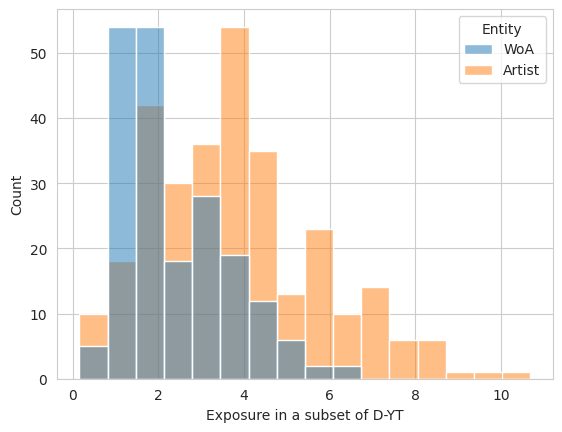

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.histplot(_.dropna(subset="exposure_max"), x="exposure_max", hue="Entity")
plt.xlabel("Exposure in a subset of D-YT")
plt.savefig("../figures/hist_exposure_dataset.pdf")
plt.show()


In [10]:
data_exposure = _.pivot_table(index=['id'],
                              columns='Entity',
                              values=['name', 'sitelinks_max', 'exposure_max'],
                              aggfunc='first').reset_index()
data_exposure.columns = ["id", "exposure_Artist", "exposure_WoA", "name_Artist", "name_WoA", "sitelinks_Artist", "sitelinks_WoA"]
data_exposure


,id,exposure_Artist,exposure_WoA,name_Artist,name_WoA,sitelinks_Artist,sitelinks_WoA
0,1009_1MuNPBL0hMg,1.008419,NaN,vsop,NaN,1.0,NaN
1,1026_Ng4uw6k2RVM,4.324027,1.008419,john kay,i'm movin' on,21.0,1.0
2,1026_idphZ2fY_a0,5.012986,NaN,duane eddy,NaN,29.0,NaN
3,102_O3mnspFrGj8,NaN,2.965611,NaN,you'll never walk alone,NaN,9.0
4,102_nbkPuH9rjKs,4.852235,2.965611,trisha yearwood,you'll never walk alone,27.0,9.0
...,...,...,...,...,...,...,...
389,9840_1FEB2_ywkjU,2.301332,NaN,margie joseph,NaN,5.0,NaN
390,986_6XuJ0E1Qu_c,6.981762,1.008419,django reinhardt,fine and dandy,64.0,1.0
391,9912_nuJnW0ow4bY,3.822592,NaN,little milton,NaN,16.0,NaN
392,9960_wK63eUyk-iM,8.632872,NaN,john travolta,NaN,113.0,NaN


# Results
##### Join Factual Memorization & Wikidata Exposure

In [11]:
data_joint = pd.merge(data_memorization, data_exposure, on="id", how="left")


In [14]:



data = pd.read_parquet("../data/dataset/reddit+shsyt/data.parquet")


### Correctness

In [19]:
# Example: performance for subset
results = {}
for c in [c for c in data_joint.columns if c.endswith("_Correctness")]:
    
    for _group in data_joint[c].dropna().unique():

        subset = 1
        mask = (data_joint.subset == subset) & (data_joint[c] == _group)
        __inds = data_joint.loc[mask].ind.values
        __preds = [preds[i] for i in __inds]
        print(_group)
        true_iobs, pred_iobs = get_iobs_from_data(__preds)
        data_joint.loc[mask, "IOB_pred"] = pred_iobs


test_passed


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (58,) + inhomogeneous part.

In [17]:
data_joint

,id,set_id,Origin,TEXT,IOB,subset,yt_id,has_WoA,has_Artist,ind,Llama3.1-70B_Correctness,Llama3.1-8B_Correctness,exposure_Artist,exposure_WoA,name_Artist,name_WoA,sitelinks_Artist,sitelinks_WoA
0,21_L1-t3YvFH40,21.0,YouTube,"[gladys, knight, &, the, pips, -, yesterday]","[B-Artist, I-Artist, O, B-Artist, I-Artist, O,...",4,L1-t3YvFH40,True,True,0,test_passed,test_passed,NaN,3.23471,NaN,yesterday,NaN,11.0
1,21_L1-t3YvFH40,21.0,YouTube,"[gladys, knight, &, the, pips, -, yesterday]","[B-Artist, I-Artist, O, B-Artist, I-Artist, O,...",4,L1-t3YvFH40,True,True,0,test_min1,test_min1,NaN,3.23471,NaN,yesterday,NaN,11.0
2,21_4SE8UvqaSWQ,21.0,YouTube,"[hooked, on, the, beatles, -, the, end]","[B-WoA, I-WoA, I-WoA, I-WoA, O, B-WoA, I-WoA]",4,4SE8UvqaSWQ,True,False,1,test_passed,test_passed,NaN,NaN,NaN,NaN,NaN,NaN
3,21_4SE8UvqaSWQ,21.0,YouTube,"[hooked, on, the, beatles, -, the, end]","[B-WoA, I-WoA, I-WoA, I-WoA, O, B-WoA, I-WoA]",4,4SE8UvqaSWQ,True,False,1,test_min1,test_min1,NaN,NaN,NaN,NaN,NaN,NaN
4,58_hQz-aZH-ozU,58.0,YouTube,"[juan, rozoff, -, plaisir, d, amour]","[B-Artist, I-Artist, O, B-WoA, I-WoA, I-WoA]",1,hQz-aZH-ozU,True,True,0,test_min1_partly,test_min1,1.008419,NaN,juan rozoff,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,dataset4_746,12669.0,Reddit,"[songs, like, sub, urbams, cradle, ?]","[O, O, B-Artist, I-Artist, B-WoA, O]",5,746,True,True,657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3439,dataset4_747,12670.0,Reddit,"[songs, /, artists, like, quarter, past, midni...","[O, O, O, O, B-WoA, I-WoA, I-WoA, O, B-Artist]",1,747,True,True,659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3440,dataset4_748,12671.0,Reddit,"[soft, -, voiced, vocals]","[O, O, O, O]",2,748,False,False,659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3441,dataset4_749,12672.0,Reddit,"[find, me, music, with, dark, lyrics, covered,...","[O, O, O, O, O, O, O, O, O, O, O, O, O]",3,749,False,False,657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
true_iobs

[['B-Artist',
  'I-Artist',
  'O',
  'B-WoA',
  'I-WoA',
  'I-WoA',
  'I-WoA',
  'I-WoA',
  'I-WoA',
  'I-WoA'],
 ['B-Artist',
  'I-Artist',
  'O',
  'B-WoA',
  'I-WoA',
  'I-WoA',
  'O',
  'O',
  'B-Artist',
  'I-Artist',
  'O'],
 ['B-Artist', 'I-Artist', 'O', 'B-WoA', 'I-WoA', 'I-WoA', 'I-WoA', 'I-WoA'],
 ['O', 'O', 'B-WoA', 'I-WoA', 'O', 'O'],
 ['B-WoA', 'I-WoA', 'I-WoA', 'I-WoA', 'I-WoA', 'I-WoA'],
 ['B-WoA', 'I-WoA', 'I-WoA', 'I-WoA', 'I-WoA', 'O', 'O'],
 ['B-Artist',
  'I-Artist',
  'O',
  'B-WoA',
  'I-WoA',
  'I-WoA',
  'I-WoA',
  'I-WoA',
  'O',
  'O',
  'O',
  'O'],
 ['B-Artist', 'I-Artist', 'O', 'B-WoA', 'I-WoA', 'I-WoA', 'I-WoA', 'I-WoA'],
 ['B-WoA', 'I-WoA', 'O', 'B-Artist', 'I-Artist'],
 ['B-WoA',
  'I-WoA',
  'I-WoA',
  'I-WoA',
  'I-WoA',
  'O',
  'B-Artist',
  'I-Artist',
  'I-Artist',
  'I-Artist'],
 ['B-Artist', 'O', 'B-WoA', 'I-WoA', 'I-WoA', 'I-WoA'],
 ['B-WoA', 'I-WoA', 'O', 'B-Artist', 'I-Artist', 'O', 'B-Artist', 'I-Artist'],
 ['B-WoA',
  'I-WoA',
  'I-WoA',
  '

In [38]:
for k, v in results.items():
    print(k, v["overall_strict_f1_macro"], v["Artist_strict_f1"], v["Artist_strict_f1"])

test_passed 0.7128014842300556 0.6909090909090909
test_min1 0.8083333333333333 0.8666666666666666
test_min1_partly 0.6256410256410256 0.717948717948718
test_failed 0.7197368421052631 0.7894736842105262


In [31]:
d

{'overall_strict_precision_micro': 0.8235294117647058,
 'overall_strict_recall_micro': 0.6363636363636364,
 'overall_strict_f1_micro': 0.717948717948718,
 'overall_strict_correct_micro': 28,
 'overall_strict_incorrect_micro': 2,
 'overall_strict_partial_micro': 0,
 'overall_strict_missed_micro': 14,
 'overall_strict_spurious_micro': 4,
 'overall_strict_possible_micro': 44,
 'overall_strict_actual_micro': 34,
 'overall_ent_type_precision_micro': 0.8823529411764706,
 'overall_ent_type_recall_micro': 0.6818181818181818,
 'overall_ent_type_f1_micro': 0.7692307692307693,
 'overall_ent_type_correct_micro': 30,
 'overall_ent_type_incorrect_micro': 0,
 'overall_ent_type_partial_micro': 0,
 'overall_ent_type_missed_micro': 14,
 'overall_ent_type_spurious_micro': 4,
 'overall_ent_type_possible_micro': 44,
 'overall_ent_type_actual_micro': 34,
 'overall_exact_precision_micro': 0.8235294117647058,
 'overall_exact_recall_micro': 0.6363636363636364,
 'overall_exact_f1_micro': 0.717948717948718,
 'ov

In [33]:
__preds

[{'text': 'petra magoni - my favourite things',
  'performers': ['petra magoni'],
  'titles': ['my favourite things'],
  'extracted': [{'utterance': 'petra magoni',
    'label': 'PERFORMER',
    'normalized': 'Petra Magoni',
    'cue': ''},
   {'utterance': 'my favourite things',
    'label': 'TITLE',
    'normalized': 'My Favourite Things',
    'cue': ''}]},
 {'text': 'my favourite things',
  'performers': [],
  'titles': ['my favourite things'],
  'extracted': [{}]},
 {'text': 'ronny jordan - my favorite things ( 1994 )',
  'performers': ['ronny jordan'],
  'titles': ['my favorite things'],
  'extracted': [{'utterance': 'ronny jordan',
    'label': 'PERFORMER',
    'normalized': 'Ronny Jordan',
    'cue': ''},
   {'utterance': 'my favorite things',
    'label': 'TITLE',
    'normalized': 'My Favorite Things',
    'cue': ''}]},
 {'text': '«enjoy the silence» by «smashing potatoes»',
  'performers': ['«smashing potatoes»'],
  'titles': ['«enjoy the silence»'],
  'extracted': [{'utteran

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18